
# Black Scholes Equation Solved Analytically

The Black Scholes Equation revolves around modeling and predicting the price of a European Call Option (in the standard case), and in general the pricing of a variety of exotic options given knowledge of the options payout at an expiry time $T$. The Black Scholes Equation, alongside the Binomial Pricing Method can be used to prive a general class of assets called *Derivative Securities*, which in general are any security whose price is a function of an underlying security $S$, which for our cases is a stock. 

The Black-Scholes Equation is derived by using no-arbitrage pricing, and constructing a riskless portfolio, which by the Fundamental Theorem of Arbitrage Pricing, must grow at the risk-free rate. This allows us to derive the Black Scholes Equation, which we will do so below.

# Derivation

Assume that $C$ the call-option price is a function of the stock price $S_{t}$ and the current time $t$, thus $C_{t}(S_{t},t)$ is the function of the call-option price.

Additionally, we assume that $S_{t}$, the underlying stock price undergo's Geometric Brownian Motion, i.e 


$$dS_{t} = \mu S_{t}dt + \sigma S_{t}dX$$


We can then apply Ito's Lemma to $C_{t}(S_{t},t)$ to get the following...


$$dC_{t} = \frac{\partial C}{\partial t} dt + \frac{\partial C}{\partial S}dS_{t} + \frac{1}{2}\frac{\partial^{2} C}{\partial S^{2}} dS_{t}^{2}$$

Notice though that we may plugin $dS_{t}^{2} = \sigma^{2}S_{t}^{2}dt$, and $dS_{t} = \mu S_{t}dt + \sigma S_{t}dX$ to get 


$$dC_{t} = \left(\frac{\partial C}{dt} + \mu S_{t} \frac{\partial C}{\partial S} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2}\right)dt + \sigma \frac{\partial C}{\partial S} S_{t}dX $$


Now we construct a portfolio $\Pi_{t} = C_{t} + \Delta*S_{t}$, where $\Delta$ is a function of $t$ and $S_{t}$, but that it is locally constant, we want to construct a riskless portfolio, thus we want $d(\Pi_{t})$ to have no stochastic component, we will compute $d(\Pi)$, and then come to a conclusion as to what $\Delta$ must be in order to satisfy this constraint. Because $\Delta$ is locally constant, we have that 


$$d \Pi_{t} = d (C_{t} + \Delta*S_{t}) = dC_{t} + \Delta dS_{t}$$
$$= \left(\frac{\partial C}{dt} + \mu S_{t} \frac{\partial C}{\partial S} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2}\right)dt + \sigma \frac{\partial C}{\partial S} S_{t}dX + \Delta \left( \mu S_{t} dt + \sigma S_{t} dX_{t} \right)$$
$$= \left(\frac{\partial C}{dt} + \mu S_{t} \frac{\partial C}{\partial S} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} + \Delta \mu S_{t} \right)dt + \sigma S_{t} \left( \frac{\partial C}{\partial S} + \Delta \right) dX$$

Notice we want the $dX$ component to be $0$, so we must have that $\Delta = - \frac{\partial C}{\partial S}$, this is the infamous Delta-Hedging Formula. We then plug this into the above equation to get 

$$ d \Pi_{t} = \left(\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} \right)dt$$ 


Notice since $\Pi$ changes without risk, we know that it will grow at the risk free rate, thus we may assume that  


$$d \Pi_{t} = r \Pi_{t} dt$$
$$\left(\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} \right)dt = r \left(C_{t} + \Delta S_{t} \right)dt$$
$$\left(\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} \right)dt = r \left(C_{t} - \frac{\partial C}{\partial S} S_{t} \right)dt$$
$$\frac{\partial C}{dt} + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} = rC_{t} - r\frac{\partial C}{\partial S} S_{t}$$
$$\frac{\partial C}{dt} + r\frac{\partial C}{\partial S} S + \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} - rC_{t} = 0 $$
$$\frac{\partial C}{dt} +  \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} +  rS\frac{\partial C}{\partial S}  - rC = 0 $$


Notice thus that we have for a call option that 

$$C(S_{T},T) = (S_{T} - K)^{+} = \text{max}(S_{T} - K, 0)$$ 

Thus solving the Black-Scholes equation corresponds to solving the following Stochastic Partial Differential Equation given by 

$$\frac{\partial C}{dt} +  \frac{1}{2} \frac{\partial^{2} C}{\partial S^{2}}\sigma^{2}S_{t}^{2} +  rS\frac{\partial C}{\partial S}  - rC = 0 $$

with the boundary condition,

$$C(S_{T},T) = (S_{T} - K)^{+} = \text{max}(S_{T} - K, 0)$$

Thus, solving the Black-Scholes PDE gives us the value for the call option price at the current time, additionally, changing the boundary conditions allows us to consider different options, such as American Options, Asian Options, and other exotic options.

# Solving the Black-Scholes Stochastic PDE Analytically Using Python

Below we will provide some sample code which shows how to solve the Black-Scholes PDE Analytically, alongside some other methods of solving it using numerical methods.

In [17]:
%pip install py-pde 
%pip install h5py pandas pyfftw tqdm
%pip install numpy 
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [36]:
import numpy as np 
import matplotlib.pyplot as plt

#for simulating brownian motion
import pandas as pd 
import seaborn as sns
import math

# Simulate Brownian Motion

Below we will utilize the equation

$$W(t_{i+1}) = W(t_{i}) + \sqrt{t_{i + 1} - t_{i}} Z_{i + 1}$$

is a recurrence relation for the brownian motion, check [Glasserman, 2003] (Monte Carlo Methods for Financial Engineering by Paul Glasserman) for more details, and $Z_{i+1}$ is a normally distributed random variable. Also check the link (https://www.quantstart.com/articles/brownian-motion-simulation-with-python/) for more details about the derivation.

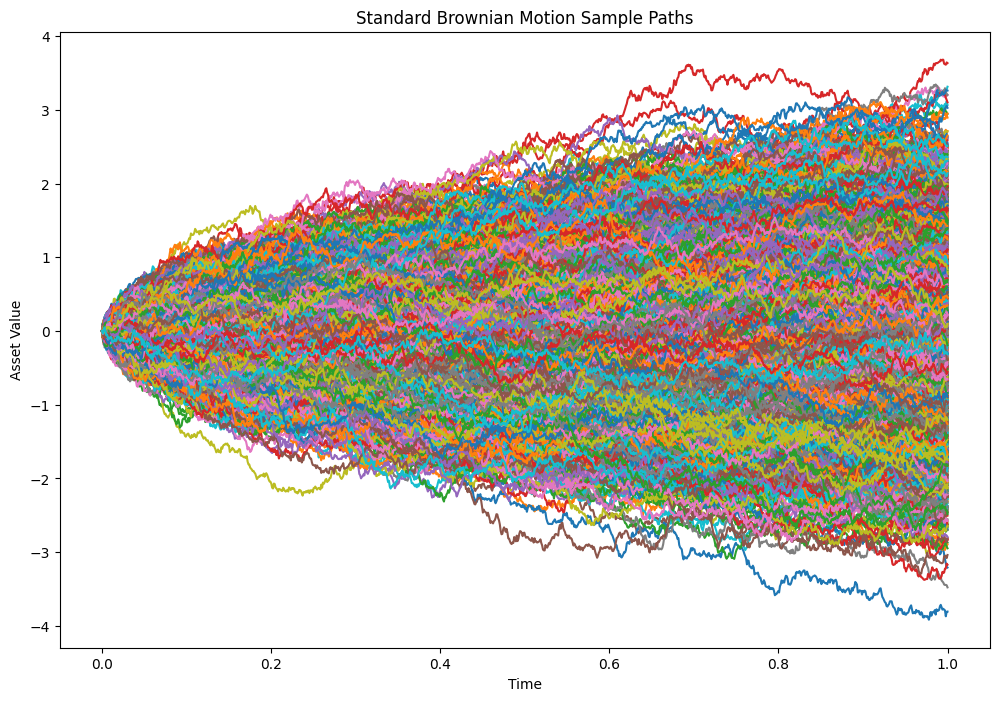

In [57]:
#plot brownian motion
sigma = 1.0                 #standard div
mu = 0.0                    #mean
S0 = 1.0                    #initial stock price
paths = 5000                #number of brownian motion paths

dt = 0.001                  #time step
T = 1.0                     #end time
n = int(T/ dt)              # number of steps
t = np.linspace(0,T,n)      # time step vector
W = np.zeros((paths,n))     # W Matrix, each row correponds to a brownian motion path
interval = [0.0,T]          # time interval 


#Create the random number generator
rng = np.random.default_rng(42)
#sample from the Normal distribution with mean 0 and standard deviation 1 
Z = rng.normal(mu, sigma, (paths, n))

for j in range(paths):
    for i in range(1, W.shape[1]):
        #Compute using the recurrence relation
        W[j][i] = W[j][i-1] + math.sqrt(t[i] - t[i-1])*Z[j][i]

#now let's plot the points
fig, ax = plt.subplots(1,1, figsize=(12,8))
for j in range(paths):
    ax.plot(t, W[j,:])
ax.set_title("Standard Brownian Motion Sample Paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()


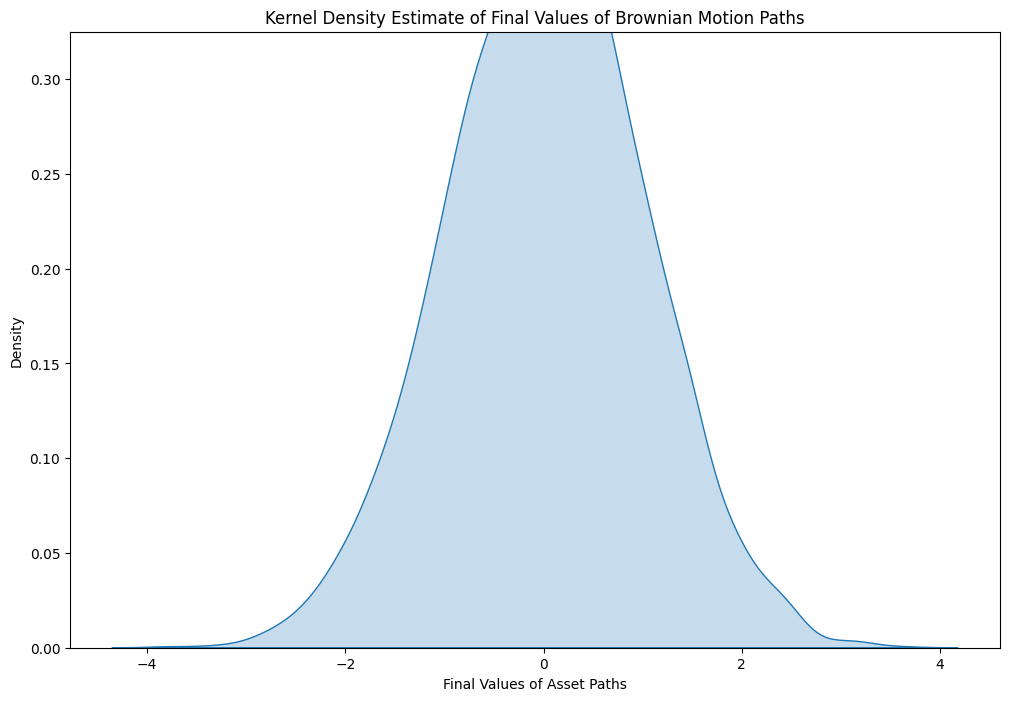

final_values    0.027777
dtype: float64 final_values    0.996783
dtype: float64


In [59]:
#we can also look at the distribution of the final values of the paths
final_values = pd.DataFrame({"final_values": W[:, -1]})
# now we will use Seaborn to estimate and plot the KDE distribution of the final values
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.kdeplot(data=final_values, x="final_values", fill=True, ax=ax)
ax.set_title("Kernel Density Estimate of Final Values of Brownian Motion Paths")
ax.set_ylim(0.0, 0.325)
ax.set_xlabel("Final Values of Asset Paths")
plt.show()

# notice that this is approximately normal, and we can improve this by adding more paths, and seeing this!
print(final_values.mean(),final_values.std())

## Constant Drift and Volatility Brownian Motion

Now consider a brownian motion with constant drift and volatility, then we have the recurrence relation 

$$X(t_{i+1}) = X(t_{i}) + \mu(t_{i+1} - t_{i}) + \sigma \sqrt{t_{i+1} - t_{i}}Z_{i+1}$$ 

Also, here's a link to a solution for Geometric Brownian Motion (https://www.quantstart.com/articles/Geometric-Brownian-Motion/)!

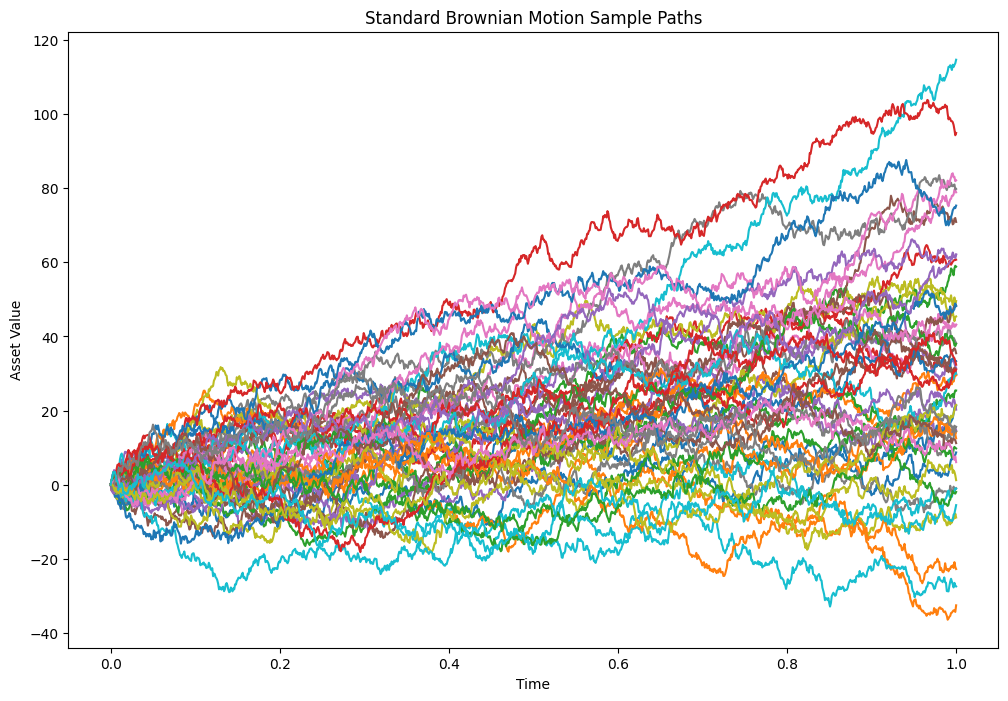

In [81]:
#plot brownian motion
sigma = 5.0                 #standard div
mu = 0.2                    #mean
paths = 50                  #number of brownian motion paths

points = 1000                                        #number of points along the path
X = np.zeros((paths,points))                         # W Matrix, each row correponds to a brownian motion path
interval = [0.0,T]                                   #time interval 
dt = (interval[1] - interval[0]) / (points - 1)
t = np.linspace(interval[0],interval[1],points)      # time step vector


#Create the random number generator
rng = np.random.default_rng(42)
#sample from the Normal distribution with mean 0 and standard deviation 1 
Z = rng.normal(mu, sigma, (paths, points))

for j in range(paths):
    for i in range(1, X.shape[1]):
        #Compute using the recurrence relation
        X[j][i] = X[j][i-1] + mu*(dt) +  sigma*math.sqrt(dt)*Z[j][i]

#now let's plot the points
fig, ax = plt.subplots(1,1, figsize=(12,8))
for j in range(paths):
    ax.plot(t, X[j,:])
ax.set_title("Standard Brownian Motion Sample Paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()

# Solving the Black-Scholes Equation

In [61]:
# first we will begin by defining the key constants which we will use for solving the Black-Scholes Equation/ setting up the system.
VOLATILITY = 2.0 
RISK_FREE_RATE = 0.001